#Space Titanic Classification Project

### Data Import, Manipulation and Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf

In [2]:
titanic_df=pd.read_csv("/content/drive/MyDrive/Space_Titanic_Data/train.csv")

In [3]:
titanic_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
pass_id1=[]
pass_id2=[]
for i in titanic_df["PassengerId"]:
  i=str(i)
  pass_id1.append(int(i[:4]))
  pass_id2.append(int(i[5:]))

In [5]:
titanic_df["PassengerId_1"]=pass_id1
titanic_df["PassengerId_2"]=pass_id2

In [6]:
titanic_df.drop('PassengerId',axis=1,inplace=True)

In [7]:
titanic_df["HomePlanet"]=pd.Categorical(titanic_df["HomePlanet"])
titanic_df['HomePlanet'] = titanic_df["HomePlanet"].cat.codes

In [8]:
titanic_df["CryoSleep"]=pd.Categorical(titanic_df["CryoSleep"])
titanic_df["CryoSleep"] = titanic_df["CryoSleep"].cat.codes
titanic_df["Destination"]=pd.Categorical(titanic_df["Destination"])
titanic_df["Destination"] = titanic_df["Destination"].cat.codes
titanic_df["VIP"]=pd.Categorical(titanic_df["VIP"])
titanic_df["VIP"] = titanic_df["VIP"].cat.codes
titanic_df["Transported"]=pd.Categorical(titanic_df["Transported"])
titanic_df["Transported"] = titanic_df["Transported"].cat.codes

In [9]:
titanic_df.isna().sum()

HomePlanet         0
CryoSleep          0
Cabin            199
Destination        0
Age              179
VIP                0
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
PassengerId_1      0
PassengerId_2      0
dtype: int64

In [10]:
letter1=[]
letter2=[]
nums=[]
for i in titanic_df["Cabin"]:
  i=str(i)
  letter1.append(i[:1])
  try:
    nums.append(int(i[2:-2]))
  except:
    nums.append(-1)
  letter2.append(i[-1:])

In [11]:
titanic_df["Cabin_1"]=letter1
titanic_df["Cabin_2"]=nums
titanic_df["Cabin_3"]=letter2

In [12]:
titanic_df.drop("Cabin",axis=1,inplace=True)

In [13]:
titanic_df["Age"].fillna(round(titanic_df["Age"].median()),inplace=True)

In [14]:
titanic_df["RoomService"].fillna(round(titanic_df["RoomService"].median()),inplace=True)
titanic_df["FoodCourt"].fillna(round(titanic_df["FoodCourt"].median()),inplace=True)
titanic_df["ShoppingMall"].fillna(round(titanic_df["ShoppingMall"].median()),inplace=True)
titanic_df["VRDeck"].fillna(round(titanic_df["VRDeck"].median()),inplace=True)
titanic_df["Spa"].fillna(round(titanic_df["Spa"].median()),inplace=True)

In [15]:
titanic_df["Cabin_1"]=pd.Categorical(titanic_df["Cabin_1"])
titanic_df['Cabin_1'] = titanic_df["Cabin_1"].cat.codes
titanic_df["Cabin_3"]=pd.Categorical(titanic_df["Cabin_3"])
titanic_df['Cabin_3'] = titanic_df["Cabin_3"].cat.codes

In [16]:
name1=[]
name2=[]
for i in titanic_df["Name"]:
  i=str(i).split()
  name1.append(str(i[0]))
  try:
    name2.append(str(i[1]))
  except:
    name2.append("nan")

In [17]:
titanic_df["Name_1"]=name1
titanic_df["Name_2"]=name2

In [18]:
titanic_df.drop("Name",axis=1,inplace=True)

In [19]:
titanic_df["Name_1"]=pd.Categorical(titanic_df["Name_1"])
titanic_df['Name_1'] = titanic_df["Name_1"].cat.codes
titanic_df["Name_2"]=pd.Categorical(titanic_df["Name_2"])
titanic_df['Name_2'] = titanic_df["Name_2"].cat.codes

In [20]:
titanic_df.dtypes

HomePlanet          int8
CryoSleep           int8
Destination         int8
Age              float64
VIP                 int8
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Transported         int8
PassengerId_1      int64
PassengerId_2      int64
Cabin_1             int8
Cabin_2            int64
Cabin_3             int8
Name_1             int16
Name_2             int16
dtype: object

In [21]:
titanic_df.isna().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
PassengerId_1    0
PassengerId_2    0
Cabin_1          0
Cabin_2          0
Cabin_3          0
Name_1           0
Name_2           0
dtype: int64

In [22]:
titanic_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerId_1,PassengerId_2,Cabin_1,Cabin_2,Cabin_3,Name_1,Name_2
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,0,0,1614,1431
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,2,1,5,0,1,1407,2109
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,3,1,0,0,1,156,1990
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,3,2,0,0,1,2276,1990
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,4,1,5,1,1,2642,1778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,9276,1,0,98,0,1135,1416
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,9278,1,6,1499,1,1492,1341
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,9279,1,6,1500,1,955,470
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,9280,1,4,608,1,526,996


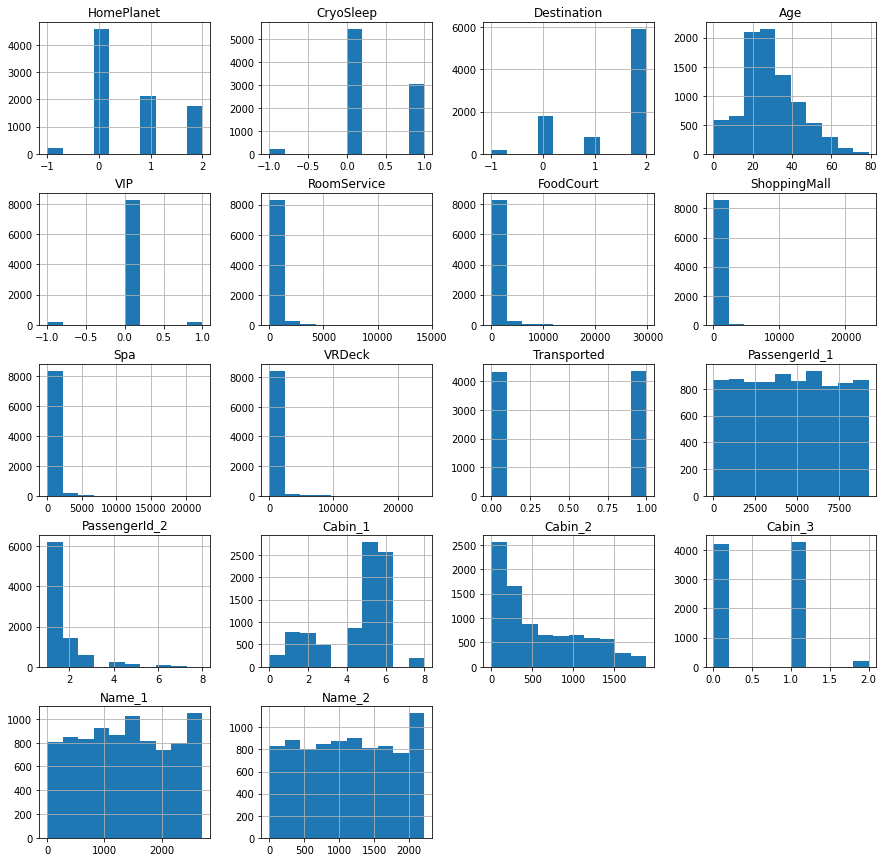

In [23]:
titanic_df.hist(figsize=(15,15));

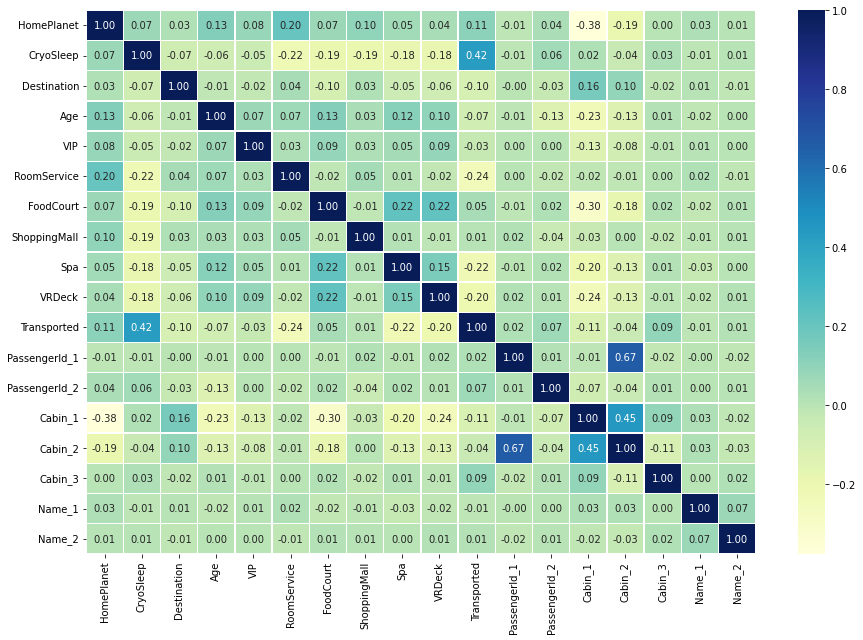

In [24]:
corr_matrix=titanic_df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

### Machine Learning Model

In [25]:
X=titanic_df.drop("Transported",axis=1)
y=titanic_df["Transported"]

In [26]:
np.random.seed(69)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [27]:
models_dict={"Linear_SVC": LinearSVC(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "SVC": SVC(),
            "RandomForestClassifier": RandomForestClassifier(),
             "LogisticRegression": LogisticRegression(),
            "AdaBoost":AdaBoostClassifier(),
            "GradientBoosting":GradientBoostingClassifier()}

In [28]:
def fit_and_score_models(models,X_train,y_train,X_test,y_test):
    """
    Fits and evaluates a machine learning model using sklearn's .fit() and .score() functions.
    models=dictionary of model names and model functions(according to sklearn's standard nomenclature)
    X_train=Pandas DataFrame used for fitting the model(given variables)
    y_train=Pandas DataFrame used for fitting the model(target)
    X_test=Pandas DataFrame used for evaluating the model
    y_test=Pandas DataFrame used for evaluating the model
    """
    results={}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        results[model_name] = model.score(X_test, y_test)
    return results

In [29]:
results=fit_and_score_models(models_dict,X_train,y_train,X_test,y_test)
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1],reverse=1)}
print("3 Most Promising Models:\n",list(results.items())[0],"\n",list(results.items())[1],"\n",list(results.items())[2])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


3 Most Promising Models:
 ('RandomForestClassifier', 0.8010350776308223) 
 ('GradientBoosting', 0.7929844738355377) 
 ('AdaBoost', 0.7918343875790684)


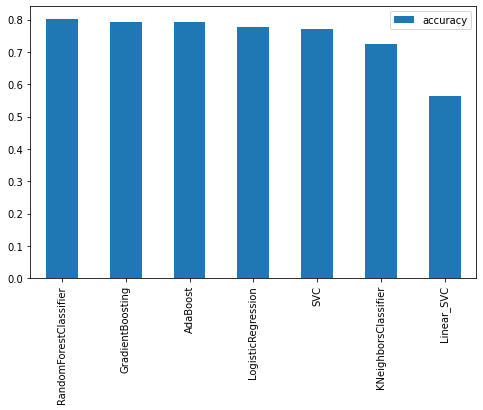

In [30]:
results_df=pd.DataFrame.from_dict(results, orient='index',columns=['accuracy'])
results_df.plot.bar(figsize=(8,5));

#### Tuning Hyperparameters for RandomForestClassifier

In [31]:
rs_rfc_grid={"n_estimators":[5,100,500],"criterion":["gini", "entropy", "log_loss"],"max_depth":[None,2,10,100,1000],"min_samples_split":[1,5,10],"min_samples_leaf":[1,3]}

In [32]:
""" rs_rfc_clf = GridSearchCV(estimator=RandomForestClassifier(),
                                param_grid=rs_rfc_grid,
                                cv=5,
                                verbose=2)
rs_rfc_clf.fit(X_train,y_train) """

' rs_rfc_clf = GridSearchCV(estimator=RandomForestClassifier(),\n                                param_grid=rs_rfc_grid,\n                                cv=5,\n                                verbose=2)\nrs_rfc_clf.fit(X_train,y_train) '

In [33]:
#rs_rfc_clf.best_params_

In [34]:
#rs_rfc_clf.score(X_test,y_test)

### Neural Network Approach

#### Data Normalization

In [35]:
def normalize_data(database_col):
  divider=max(database_col)
  vals=[]
  for i in database_col:
    vals.append(i/divider)
  return vals

In [36]:
titanic_df["Age"]=normalize_data(titanic_df["Age"])

In [37]:
titanic_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'PassengerId_1', 'PassengerId_2', 'Cabin_1', 'Cabin_2', 'Cabin_3',
       'Name_1', 'Name_2'],
      dtype='object')

In [38]:
for i in titanic_df.columns:
  if i!='Age':
    titanic_df[i]=normalize_data(titanic_df[i])

In [39]:
titanic_df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,PassengerId_1,PassengerId_2,Cabin_1,Cabin_2,Cabin_3,Name_1,Name_2
0,0.5,0.0,1.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000108,0.125,0.125,0.000000,0.0,0.596452,0.645467
1,0.0,0.0,1.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,0.000216,0.125,0.625,0.000000,0.5,0.519956,0.951286
2,0.5,0.0,1.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,0.000323,0.125,0.000,0.000000,0.5,0.057650,0.897609
3,0.5,0.0,1.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,0.000323,0.250,0.000,0.000000,0.5,0.841094,0.897609
4,0.0,0.0,1.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,0.000431,0.125,0.625,0.000528,0.5,0.976349,0.801985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.5,0.0,0.0,0.518987,1.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.0,0.999569,0.125,0.000,0.051742,0.0,0.419438,0.638701
8689,0.0,1.0,0.5,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.999784,0.125,0.750,0.791447,0.5,0.551367,0.604871
8690,0.0,0.0,1.0,0.329114,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,1.0,0.999892,0.125,0.750,0.791975,0.5,0.352919,0.211998
8691,0.5,0.0,0.0,0.405063,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,0.0,1.000000,0.125,0.500,0.321014,0.5,0.194383,0.449256


In [40]:
X=titanic_df.drop("Transported",axis=1)
y=titanic_df["Transported"]

In [41]:
np.random.seed(69)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

#### Modelling the Neural Network

In [42]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(17),
    tf.keras.layers.Dense(34,activation="relu"),
    tf.keras.layers.Dense(15,activation="relu"),
    tf.keras.layers.Dense(5,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
history_2=model_2.fit(X_train,y_train,epochs=70, callbacks=[lr_scheduler],validation_data=(X_test,y_test))

Epoch 1/70
218/218 [==============================] - 3s 6ms/step - loss: 0.6875 - accuracy: 0.5785 - val_loss: 0.6832 - val_accuracy: 0.6101 - lr: 1.0000e-04
Epoch 2/70
218/218 [==============================] - 1s 4ms/step - loss: 0.6780 - accuracy: 0.6309 - val_loss: 0.6713 - val_accuracy: 0.6469 - lr: 1.1220e-04
Epoch 3/70
218/218 [==============================] - 1s 3ms/step - loss: 0.6611 - accuracy: 0.6667 - val_loss: 0.6484 - val_accuracy: 0.6699 - lr: 1.2589e-04
Epoch 4/70
218/218 [==============================] - 1s 2ms/step - loss: 0.6311 - accuracy: 0.6877 - val_loss: 0.6123 - val_accuracy: 0.6935 - lr: 1.4125e-04
Epoch 5/70
218/218 [==============================] - 0s 2ms/step - loss: 0.5942 - accuracy: 0.7049 - val_loss: 0.5838 - val_accuracy: 0.7062 - lr: 1.5849e-04
Epoch 6/70
218/218 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.7180 - val_loss: 0.5654 - val_accuracy: 0.7211 - lr: 1.7783e-04
Epoch 7/70
218/218 [==========================

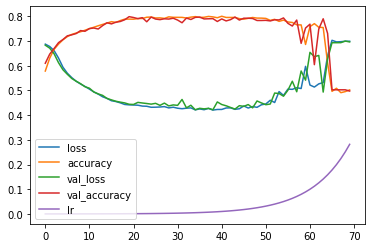

In [43]:
pd.DataFrame(history_2.history).plot();

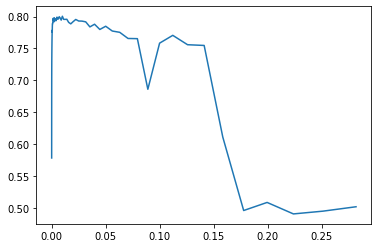

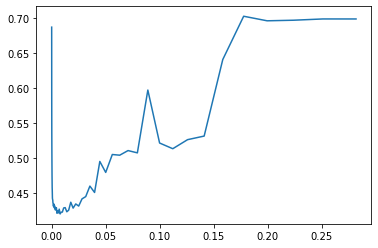

In [44]:
lr=pd.DataFrame(history_2.history)["lr"]
acc=pd.DataFrame(history_2.history)["accuracy"]
loss=pd.DataFrame(history_2.history)["loss"]
plt.plot(lr,acc);
plt.show()
plt.plot(lr,loss);
plt.show()

In [45]:
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(17),
    tf.keras.layers.Dense(34,activation="tanh"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
                metrics=["accuracy"])
history_3=model_3.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
218/218 [==============================] - 1s 3ms/step - loss: 0.5384 - accuracy: 0.7324 - val_loss: 0.4937 - val_accuracy: 0.7614
Epoch 2/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7630 - val_loss: 0.4747 - val_accuracy: 0.7700
Epoch 3/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4674 - accuracy: 0.7761 - val_loss: 0.4905 - val_accuracy: 0.7522
Epoch 4/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.7852 - val_loss: 0.4516 - val_accuracy: 0.7826
Epoch 5/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.7872 - val_loss: 0.4456 - val_accuracy: 0.7907
Epoch 6/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.7905 - val_loss: 0.4501 - val_accuracy: 0.7798
Epoch 7/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.7896 - val_loss: 0.4421 - val_accuracy: 0.7809

### Changing the Data

#### Inital Data Drop

In [46]:
X=titanic_df.drop("Transported",axis=1)
y=titanic_df["Transported"]
np.random.seed(69)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
models_dict={"Linear_SVC": LinearSVC(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "SVC": SVC(),
            "RandomForestClassifier": RandomForestClassifier(),
             "LogisticRegression": LogisticRegression(),
            "AdaBoost":AdaBoostClassifier(),
            "GradientBoosting":GradientBoostingClassifier()}

In [52]:
results=fit_and_score_models(models_dict,X_train,y_train,X_test,y_test)
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1],reverse=1)}
print("3 Most Promising Models:\n",list(results.items())[0],"\n",list(results.items())[1],"\n",list(results.items())[2])

3 Most Promising Models:
 ('RandomForestClassifier', 0.7947096032202415) 
 ('GradientBoosting', 0.7929844738355377) 
 ('AdaBoost', 0.7918343875790684)


In [54]:
titanic_df.drop('Name_2',axis=1,inplace=True)
titanic_df.drop('Name_1',axis=1,inplace=True)
titanic_df.drop('ShoppingMall',axis=1,inplace=True)
titanic_df.drop('PassengerId_1',axis=1,inplace=True)
titanic_df.drop('VIP',axis=1,inplace=True)

In [56]:
X=titanic_df.drop("Transported",axis=1)
y=titanic_df["Transported"]
np.random.seed(69)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
models_dict={"Linear_SVC": LinearSVC(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "SVC": SVC(),
            "RandomForestClassifier": RandomForestClassifier(),
             "LogisticRegression": LogisticRegression(),
            "AdaBoost":AdaBoostClassifier(),
            "GradientBoosting":GradientBoostingClassifier()}

In [59]:
results=fit_and_score_models(models_dict,X_train,y_train,X_test,y_test)
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1],reverse=1)}
print("3 Most Promising Models:\n",list(results.items())[0],"\n",list(results.items())[1],"\n",list(results.items())[2])

3 Most Promising Models:
 ('RandomForestClassifier', 0.7958596894767107) 
 ('GradientBoosting', 0.7947096032202415) 
 ('AdaBoost', 0.7878090856814262)


In [60]:
model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(17),
    tf.keras.layers.Dense(34,activation="tanh"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.006),
                metrics=["accuracy"])
history_4=model_4.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
218/218 [==============================] - 1s 3ms/step - loss: 0.5315 - accuracy: 0.7367 - val_loss: 0.4891 - val_accuracy: 0.7614
Epoch 2/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4779 - accuracy: 0.7726 - val_loss: 0.4756 - val_accuracy: 0.7706
Epoch 3/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.7725 - val_loss: 0.4518 - val_accuracy: 0.7809
Epoch 4/100
218/218 [==============================] - 1s 2ms/step - loss: 0.4595 - accuracy: 0.7755 - val_loss: 0.4565 - val_accuracy: 0.7815
Epoch 5/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4564 - accuracy: 0.7788 - val_loss: 0.4870 - val_accuracy: 0.7568
Epoch 6/100
218/218 [==============================] - 0s 2ms/step - loss: 0.4553 - accuracy: 0.7783 - val_loss: 0.4998 - val_accuracy: 0.7723
Epoch 7/100
218/218 [==============================] - 1s 3ms/step - loss: 0.4474 - accuracy: 0.7775 - val_loss: 0.4457 - val_accuracy: 0.7775

#### Further Data Cropping

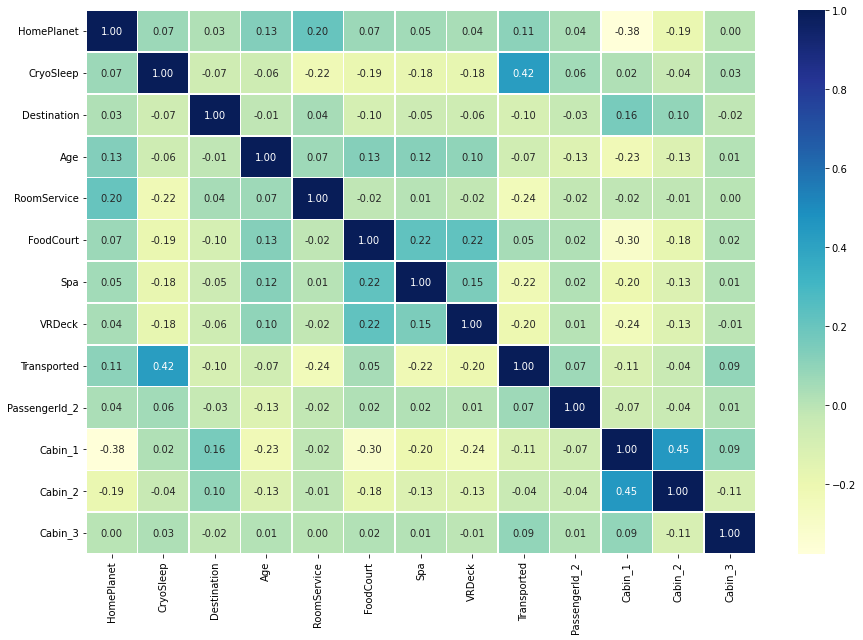

In [61]:
corr_matrix=titanic_df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

In [62]:
titanic_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'RoomService',
       'FoodCourt', 'Spa', 'VRDeck', 'Transported', 'PassengerId_2', 'Cabin_1',
       'Cabin_2', 'Cabin_3'],
      dtype='object')

In [63]:
titanic_df.drop('Age',axis=1,inplace=True)
titanic_df.drop('PassengerId_2',axis=1,inplace=True)
titanic_df.drop('FoodCourt',axis=1,inplace=True)
titanic_df.drop('Cabin_2',axis=1,inplace=True)

In [64]:
X=titanic_df.drop("Transported",axis=1)
y=titanic_df["Transported"]
np.random.seed(69)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
models_dict={"Linear_SVC": LinearSVC(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "SVC": SVC(),
            "RandomForestClassifier": RandomForestClassifier(),
             "LogisticRegression": LogisticRegression(),
            "AdaBoost":AdaBoostClassifier(),
            "GradientBoosting":GradientBoostingClassifier()}

In [65]:
results=fit_and_score_models(models_dict,X_train,y_train,X_test,y_test)
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1],reverse=1)}
print("3 Most Promising Models:\n",list(results.items())[0],"\n",list(results.items())[1],"\n",list(results.items())[2])

3 Most Promising Models:
 ('GradientBoosting', 0.7889591719378953) 
 ('RandomForestClassifier', 0.777458309373203) 
 ('AdaBoost', 0.7751581368602645)


In [67]:
model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(17),
    tf.keras.layers.Dense(34,activation="tanh"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4*10**(epoch/20))
history_5=model_5.fit(X_train,y_train,epochs=70, callbacks=[lr_scheduler],validation_data=(X_test,y_test))

Epoch 1/70
218/218 [==============================] - 2s 5ms/step - loss: 0.6773 - accuracy: 0.6050 - val_loss: 0.6465 - val_accuracy: 0.7108 - lr: 1.0000e-04
Epoch 2/70
218/218 [==============================] - 1s 3ms/step - loss: 0.6213 - accuracy: 0.7190 - val_loss: 0.6032 - val_accuracy: 0.7171 - lr: 1.1220e-04
Epoch 3/70
218/218 [==============================] - 1s 4ms/step - loss: 0.5892 - accuracy: 0.7213 - val_loss: 0.5831 - val_accuracy: 0.7177 - lr: 1.2589e-04
Epoch 4/70
218/218 [==============================] - 1s 4ms/step - loss: 0.5736 - accuracy: 0.7230 - val_loss: 0.5742 - val_accuracy: 0.7200 - lr: 1.4125e-04
Epoch 5/70
218/218 [==============================] - 1s 6ms/step - loss: 0.5646 - accuracy: 0.7232 - val_loss: 0.5658 - val_accuracy: 0.7182 - lr: 1.5849e-04
Epoch 6/70
218/218 [==============================] - 1s 3ms/step - loss: 0.5576 - accuracy: 0.7249 - val_loss: 0.5600 - val_accuracy: 0.7194 - lr: 1.7783e-04
Epoch 7/70
218/218 [==========================

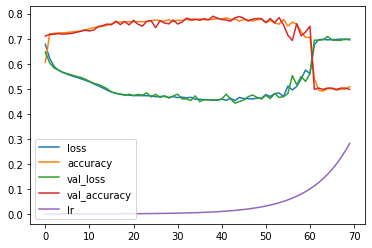

In [68]:
pd.DataFrame(history_5.history).plot();

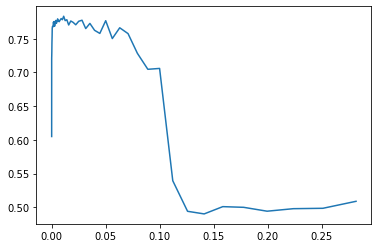

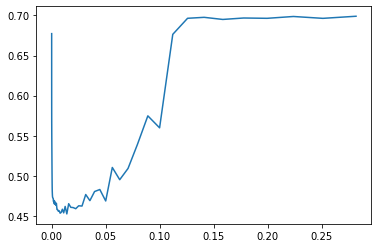

In [69]:
lr=pd.DataFrame(history_5.history)["lr"]
acc=pd.DataFrame(history_5.history)["accuracy"]
loss=pd.DataFrame(history_5.history)["loss"]
plt.plot(lr,acc);
plt.show()
plt.plot(lr,loss);
plt.show()

In [70]:
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(17),
    tf.keras.layers.Dense(34,activation="tanh"),
    tf.keras.layers.Dense(8,activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_6=model_6.fit(X_train,y_train,epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
218/218 [==============================] - 2s 7ms/step - loss: 0.5920 - accuracy: 0.6914 - val_loss: 0.5568 - val_accuracy: 0.7188
Epoch 2/100
218/218 [==============================] - 1s 4ms/step - loss: 0.5406 - accuracy: 0.7299 - val_loss: 0.5355 - val_accuracy: 0.7355
Epoch 3/100
218/218 [==============================] - 1s 3ms/step - loss: 0.5187 - accuracy: 0.7396 - val_loss: 0.5184 - val_accuracy: 0.7435
Epoch 4/100
218/218 [==============================] - 1s 4ms/step - loss: 0.5000 - accuracy: 0.7502 - val_loss: 0.4941 - val_accuracy: 0.7441
Epoch 5/100
218/218 [==============================] - 1s 4ms/step - loss: 0.4871 - accuracy: 0.7550 - val_loss: 0.4813 - val_accuracy: 0.7677
Epoch 6/100
218/218 [==============================] - 1s 4ms/step - loss: 0.4787 - accuracy: 0.7632 - val_loss: 0.4780 - val_accuracy: 0.7711
Epoch 7/100
218/218 [==============================] - 1s 4ms/step - loss: 0.4738 - accuracy: 0.7692 - val_loss: 0.4788 - val_accuracy: 0.7677

It is clear that it is becoming almost impossible to find a better model for this data, as such it may be a good idea to reimport the data and try to add new columns in which the solution may be hidden

## Data Download and Second Approach

In [141]:
titanic_df=pd.read_csv("/content/drive/MyDrive/Space_Titanic_Data/train.csv")

In [142]:
titanic_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [143]:
pass_id1=[]
pass_id2=[]
for i in titanic_df["PassengerId"]:
  i=str(i)
  pass_id1.append(int(i[:4]))
  pass_id2.append(int(i[5:]))

In [144]:
titanic_df["PassengerId_1"]=pass_id1
titanic_df["PassengerId_2"]=pass_id2

In [145]:
titanic_df.drop('PassengerId',axis=1,inplace=True)

In [146]:
e=[]
for i in titanic_df["HomePlanet"]:
  if i=="Europa" or i=="Earth":
    e.append(1)
  else:
    e.append(0)
titanic_df["HomePlanet_E"]=e

In [147]:
titanic_df["HomePlanet"].fillna("Earth",inplace=True)
titanic_df["CryoSleep"].fillna("False",inplace=True)
titanic_df["Destination"].fillna("TRAPPIST-1e",inplace=True)
titanic_df["Age"].fillna(titanic_df["Age"].median(),inplace=True)
titanic_df["VIP"].fillna("False",inplace=True)
titanic_df["RoomService"].fillna(titanic_df["RoomService"].median(),inplace=True)
titanic_df["FoodCourt"].fillna(titanic_df["FoodCourt"].median(),inplace=True)
titanic_df["ShoppingMall"].fillna(titanic_df["ShoppingMall"].median(),inplace=True)
titanic_df["Spa"].fillna(titanic_df["Spa"].median(),inplace=True)
titanic_df["VRDeck"].fillna(titanic_df["VRDeck"].median(),inplace=True)

In [148]:
titanic_df["HomePlanet"]=pd.Categorical(titanic_df["HomePlanet"])
titanic_df['HomePlanet'] = titanic_df["HomePlanet"].cat.codes
titanic_df["CryoSleep"]=pd.Categorical(titanic_df["CryoSleep"])
titanic_df["CryoSleep"] = titanic_df["CryoSleep"].cat.codes
titanic_df["Destination"]=pd.Categorical(titanic_df["Destination"])
titanic_df["Destination"] = titanic_df["Destination"].cat.codes
titanic_df["VIP"]=pd.Categorical(titanic_df["VIP"])
titanic_df["VIP"] = titanic_df["VIP"].cat.codes
titanic_df["Transported"]=pd.Categorical(titanic_df["Transported"])
titanic_df["Transported"] = titanic_df["Transported"].cat.codes

In [149]:
letter1=[]
letter2=[]
nums=[]
for i in titanic_df["Cabin"]:
  i=str(i)
  letter1.append(i[:1])
  try:
    nums.append(int(i[2:-2]))
  except:
    nums.append(-1)
  letter2.append(i[-1:])
titanic_df["Cabin_1"]=letter1
titanic_df["Cabin_2"]=nums
titanic_df["Cabin_3"]=letter2
titanic_df["Cabin_1"]=pd.Categorical(titanic_df["Cabin_1"])
titanic_df['Cabin_1'] = titanic_df["Cabin_1"].cat.codes
titanic_df["Cabin_3"]=pd.Categorical(titanic_df["Cabin_3"])
titanic_df['Cabin_3'] = titanic_df["Cabin_3"].cat.codes

In [150]:
titanic_df.drop("Cabin",axis=1,inplace=True)

In [151]:
name1=[]
name2=[]
for i in titanic_df["Name"]:
  i=str(i).split()
  name1.append(str(i[0]))
  try:
    name2.append(str(i[1]))
  except:
    name2.append("nan")
titanic_df["Name_1"]=name1
titanic_df["Name_2"]=name2
titanic_df.drop("Name",axis=1,inplace=True)

In [152]:
name_len1=[]
name_len2=[]
name_len3=[]
for i in titanic_df["Name_1"]:
  i=str(i)
  name_len1.append(len(i))
for j in titanic_df["Name_2"]:
  j=str(j)
  name_len2.append(len(j))
for i in range(len(name_len1)):
  name_len3.append(name_len1[i]+name_len2[i])
titanic_df["Name_Len_1"]=name_len1
titanic_df["Name_Len_2"]=name_len2
titanic_df["Name_Len_3"]=name_len3

In [153]:
max_len=0
for i in titanic_df["Name_1"]:
  i=str(i)
  if len(i)>max_len:
    max_len=len(i)
for i in range(max_len):
  vals=[]
  for ii in titanic_df["Name_1"]:
    ii=str(ii)
    try:
      vals.append(ii[i])
    except:
      vals.append('XXX')
  titanic_df["Name_Letter_"+str(i)]=vals

In [154]:
max_len=0
for i in titanic_df["Name_2"]:
  i=str(i)
  if len(i)>max_len:
    max_len=len(i)
for i in range(max_len):
  vals=[]
  for ii in titanic_df["Name_2"]:
    ii=str(ii)
    try:
      vals.append(ii[i])
    except:
      vals.append('XXX')
  titanic_df["Name2_Letter_"+str(i)]=vals

In [155]:
titanic_df.drop("Name_1",axis=1,inplace=True)
titanic_df.drop("Name_2",axis=1,inplace=True)

In [156]:
titanic_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'PassengerId_1', 'PassengerId_2', 'HomePlanet_E', 'Cabin_1', 'Cabin_2',
       'Cabin_3', 'Name_Len_1', 'Name_Len_2', 'Name_Len_3', 'Name_Letter_0',
       'Name_Letter_1', 'Name_Letter_2', 'Name_Letter_3', 'Name_Letter_4',
       'Name_Letter_5', 'Name_Letter_6', 'Name2_Letter_0', 'Name2_Letter_1',
       'Name2_Letter_2', 'Name2_Letter_3', 'Name2_Letter_4', 'Name2_Letter_5',
       'Name2_Letter_6', 'Name2_Letter_7', 'Name2_Letter_8', 'Name2_Letter_9',
       'Name2_Letter_10'],
      dtype='object')

In [157]:
for i in range(0,7):
  titanic_df["Name_Letter_"+str(i)]=pd.Categorical(titanic_df["Name_Letter_"+str(i)])
  titanic_df["Name_Letter_"+str(i)] = titanic_df["Name_Letter_"+str(i)].cat.codes
for i in range(0,11):
  titanic_df["Name2_Letter_"+str(i)]=pd.Categorical(titanic_df["Name2_Letter_"+str(i)])
  titanic_df["Name2_Letter_"+str(i)] = titanic_df["Name2_Letter_"+str(i)].cat.codes

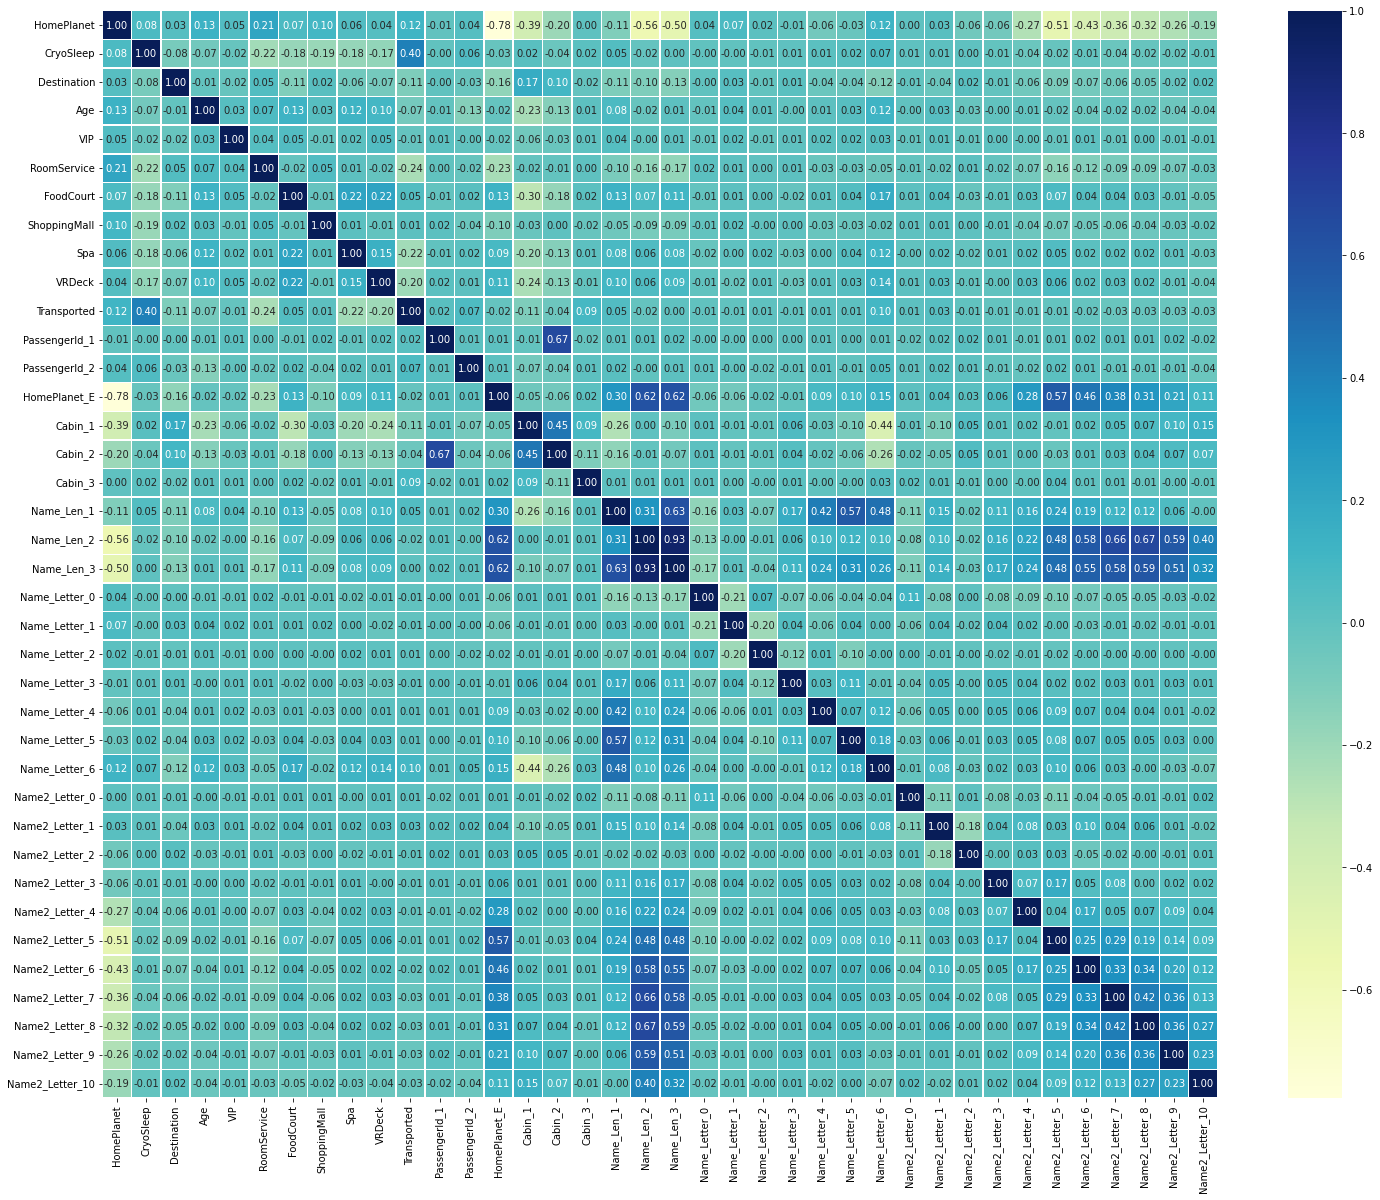

In [158]:
corr_matrix=titanic_df.corr()
fig,ax=plt.subplots(figsize=(25,20))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

In [159]:
for i in range(0,7):
  if i!=6:
    titanic_df.drop("Name_Letter_"+str(i),axis=1,inplace=True)
for i in range(0,11):
  titanic_df.drop("Name2_Letter_"+str(i),axis=1,inplace=True)

In [160]:
titanic_df.drop("Name_Len_3",axis=1,inplace=True)
titanic_df.drop("Name_Len_2",axis=1,inplace=True)

In [161]:
titanic_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'PassengerId_1', 'PassengerId_2', 'HomePlanet_E', 'Cabin_1', 'Cabin_2',
       'Cabin_3', 'Name_Len_1', 'Name_Letter_6'],
      dtype='object')

In [162]:
titanic_df.drop("Cabin_2",axis=1,inplace=True)

In [163]:
titanic_df.drop("HomePlanet_E",axis=1,inplace=True)
titanic_df.drop("PassengerId_1",axis=1,inplace=True)
titanic_df.drop("ShoppingMall",axis=1,inplace=True)
titanic_df.drop("FoodCourt",axis=1,inplace=True)
titanic_df.drop("VIP",axis=1,inplace=True)

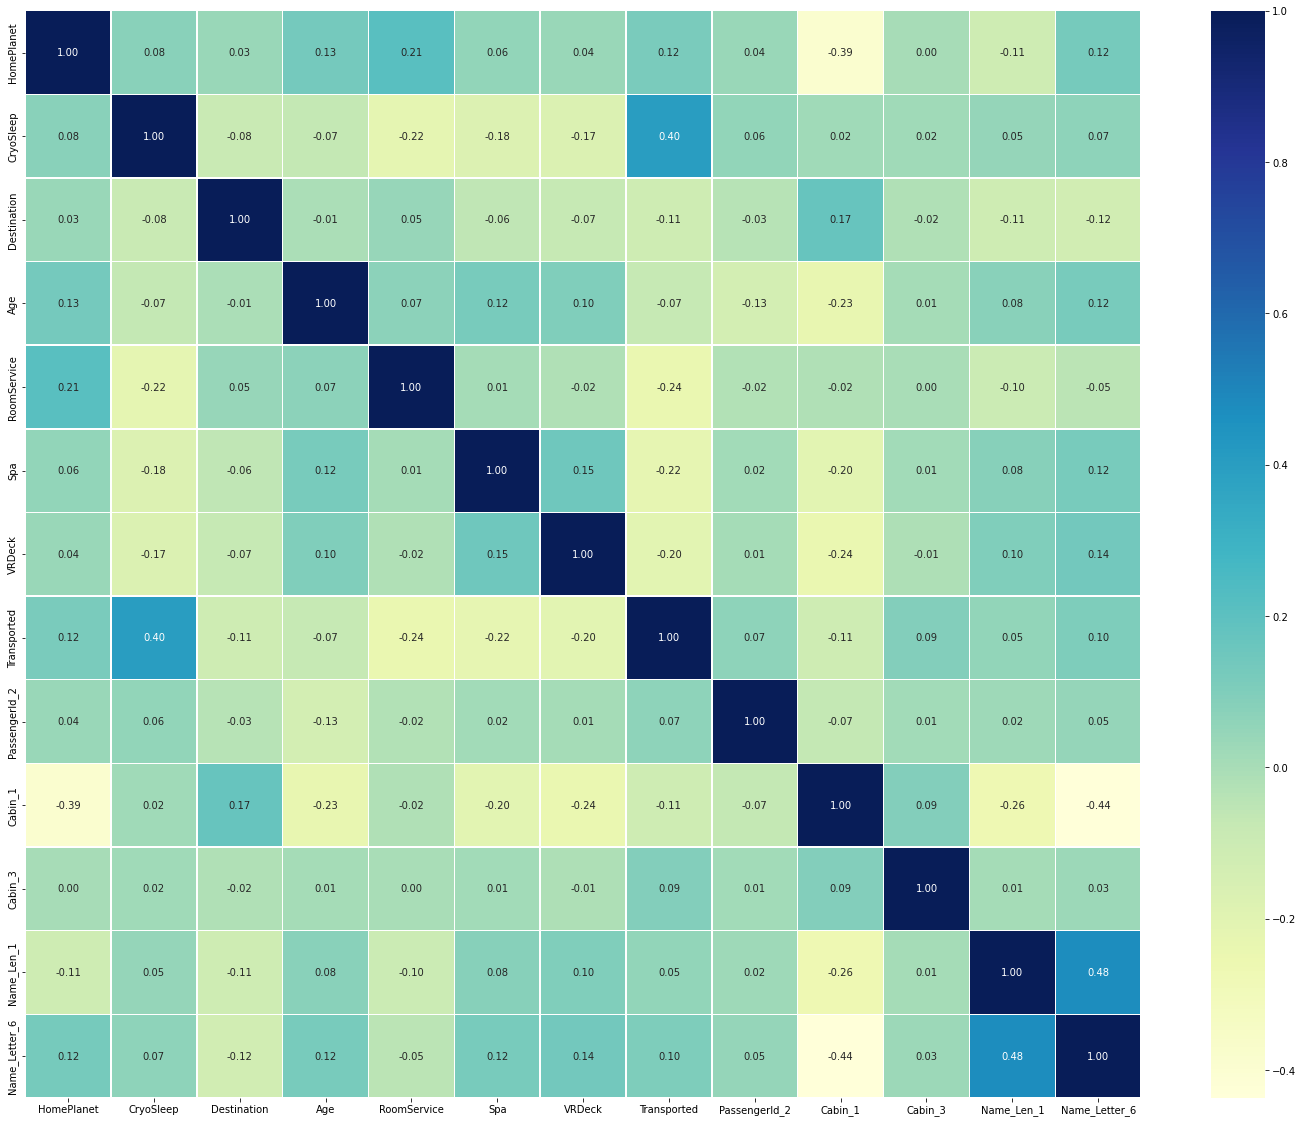

In [164]:
corr_matrix=titanic_df.corr()
fig,ax=plt.subplots(figsize=(25,20))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

In [165]:
titanic_df.isna().sum()

HomePlanet       0
CryoSleep        0
Destination      0
Age              0
RoomService      0
Spa              0
VRDeck           0
Transported      0
PassengerId_2    0
Cabin_1          0
Cabin_3          0
Name_Len_1       0
Name_Letter_6    0
dtype: int64

In [166]:
X=titanic_df.drop("Transported",axis=1)
y=titanic_df["Transported"]
np.random.seed(69)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
models_dict={"Linear_SVC": LinearSVC(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "SVC": SVC(),
            "RandomForestClassifier": RandomForestClassifier(),
             "LogisticRegression": LogisticRegression(),
            "AdaBoost":AdaBoostClassifier(),
            "GradientBoosting":GradientBoostingClassifier()}

In [167]:
results=fit_and_score_models(models_dict,X_train,y_train,X_test,y_test)
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1],reverse=1)}
print("3 Most Promising Models:\n",list(results.items())[0],"\n",list(results.items())[1],"\n",list(results.items())[2])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


3 Most Promising Models:
 ('GradientBoosting', 0.7866589994249569) 
 ('RandomForestClassifier', 0.7843588269120184) 
 ('AdaBoost', 0.7797584818861415)


### Final Approach Leaving NA Values 

In [177]:
titanic_df=pd.read_csv("/content/drive/MyDrive/Space_Titanic_Data/train.csv")

In [178]:
pass_id1=[]
pass_id2=[]
for i in titanic_df["PassengerId"]:
  i=str(i)
  pass_id1.append(int(i[:4]))
  pass_id2.append(int(i[5:]))

In [179]:
titanic_df["PassengerId_1"]=pass_id1
titanic_df["PassengerId_2"]=pass_id2

In [180]:
titanic_df.drop('PassengerId',axis=1,inplace=True)

In [181]:
letter1=[]
letter2=[]
nums=[]
for i in titanic_df["Cabin"]:
  i=str(i)
  letter1.append(i[:1])
  try:
    nums.append(int(i[2:-2]))
  except:
    nums.append(-1)
  letter2.append(i[-1:])
titanic_df.drop("Cabin",axis=1,inplace=True)

In [182]:
name1=[]
name2=[]
for i in titanic_df["Name"]:
  i=str(i).split()
  name1.append(str(i[0]))
  try:
    name2.append(str(i[1]))
  except:
    name2.append("nan")

In [183]:
titanic_df["Name_1"]=name1
titanic_df["Name_2"]=name2
titanic_df.drop("Name",axis=1,inplace=True)

In [184]:
for i in titanic_df.columns:
  titanic_df[i]=pd.Categorical(titanic_df[i])
  titanic_df[i] = titanic_df[i].cat.codes

In [193]:
titanic_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'PassengerId_1', 'PassengerId_2'],
      dtype='object')

In [194]:
titanic_df.drop("VIP",axis=1,inplace=True)
titanic_df.drop("FoodCourt",axis=1,inplace=True)
titanic_df.drop("ShoppingMall",axis=1,inplace=True)
titanic_df.drop("PassengerId_1",axis=1,inplace=True)

In [189]:
titanic_df.drop("Name_1",axis=1,inplace=True)
titanic_df.drop("Name_2",axis=1,inplace=True)

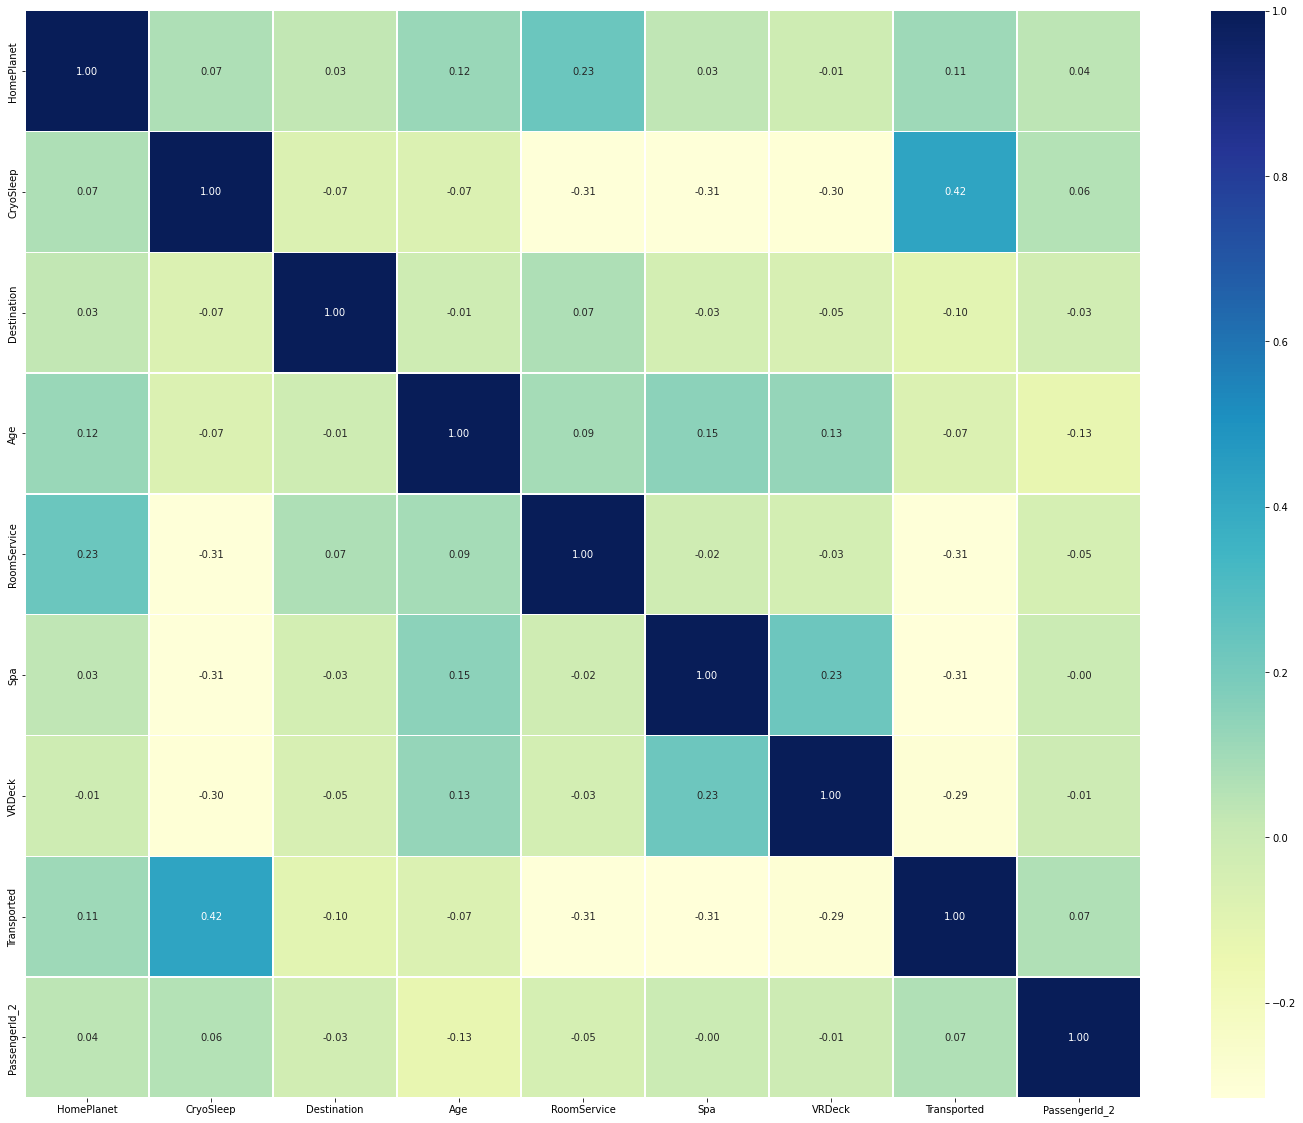

In [195]:
corr_matrix=titanic_df.corr()
fig,ax=plt.subplots(figsize=(25,20))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",
              cmap="YlGnBu")

In [196]:
X=titanic_df.drop("Transported",axis=1)
y=titanic_df["Transported"]
np.random.seed(69)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
models_dict={"Linear_SVC": LinearSVC(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "SVC": SVC(),
            "RandomForestClassifier": RandomForestClassifier(),
             "LogisticRegression": LogisticRegression(),
            "AdaBoost":AdaBoostClassifier(),
            "GradientBoosting":GradientBoostingClassifier()}

In [197]:
results=fit_and_score_models(models_dict,X_train,y_train,X_test,y_test)
results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1],reverse=1)}
print("3 Most Promising Models:\n",list(results.items())[0],"\n",list(results.items())[1],"\n",list(results.items())[2])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


3 Most Promising Models:
 ('GradientBoosting', 0.780333525014376) 
 ('AdaBoost', 0.7688326624496837) 
 ('LogisticRegression', 0.7676825761932144)
